# JALA Data Analyst Test - Lanang Bagaskara

### Import Libraries & Datasets

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
farms = pd.read_csv('farms.csv')
cycles = pd.read_csv('cycles.csv')
ponds = pd.read_csv('ponds.csv')
feeds = pd.read_csv('feeds.csv')
harvests = pd.read_csv('harvests.csv')
fasting = pd.read_csv('fasting.csv')
samplings = pd.read_csv('samplings.csv')
measurements = pd.read_csv('measurements.csv')

In [3]:
# mencari NaN values dalam dataset
print(farms.isnull().sum())
print(cycles.isnull().sum())
print(ponds.isnull().sum())
print(harvests.isnull().sum())
print(fasting.isnull().sum())
print(feeds.isnull().sum())
print(samplings.isnull().sum())

id           0
province    21
regency     23
timezone     0
dtype: int64
id             0
pond_id        0
total_seed     0
started_at     0
finished_at    0
area           0
dtype: int64
id         0
farm_id    0
length     0
width      0
deep       4
dtype: int64
cycle_id         0
size             0
weight           0
id               0
harvested_at     0
status          49
dtype: int64
logged_date     0
cycle_id        0
fasting        17
dtype: int64
cycle_id     0
logged_at    5
quantity     5
dtype: int64
cycle_id          0
sampled_at        0
average_weight    0
dtype: int64


In [4]:
# Menangani nilai yang hilang dengan drop
farms.dropna(inplace=True)
cycles.dropna(inplace=True)
ponds.dropna(inplace=True)
fasting.dropna(inplace=True)
feeds.dropna(inplace=True)
harvests.dropna(inplace=True)
samplings.dropna(inplace=True)

### Exploring the Dataset

Kami ingin mendapatkan wawasan dari kumpulan data dengan mengetahui Tingkat Kelangsungan Hidup (SR), Pertambahan Rata-Rata Harian (ADG), dan Tingkat Konversi Makanan (FCR) untuk membedakan apakah ada perbedaan kinerja budidaya berdasarkan siklus, kolam, dan peternakan.

#### Cycles Dataset

In [5]:
cycles.head()

,id,pond_id,total_seed,started_at,finished_at,area
0,18360,33945,400000,2022-12-01 00:00:00.000,2023-02-17 00:00:00.000,699.90
1,14583,31451,155792,2022-05-15 00:00:00.000,2022-07-23 00:00:00.000,1000.00
2,19049,13249,175000,2022-06-30 00:00:00.000,2022-10-12 00:00:00.000,2256.25
3,16334,7369,400200,2022-09-19 00:00:00.000,2023-01-21 00:00:00.000,2820.00
4,18740,31447,169702,2022-05-15 00:00:00.000,2022-07-23 00:00:00.000,1000.00


In [6]:
cycles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           506 non-null    int64  
 1   pond_id      506 non-null    int64  
 2   total_seed   506 non-null    int64  
 3   started_at   506 non-null    object 
 4   finished_at  506 non-null    object 
 5   area         506 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 23.8+ KB


untuk mengetahui berapa hari dalam satu siklus penuh, kita harus menghitungnya terlebih dahulu.

In [7]:
cycles['started_at'] = pd.to_datetime(cycles['started_at'])
cycles['finished_at'] = pd.to_datetime(cycles['finished_at'])

In [8]:
cycles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           506 non-null    int64         
 1   pond_id      506 non-null    int64         
 2   total_seed   506 non-null    int64         
 3   started_at   506 non-null    datetime64[ns]
 4   finished_at  506 non-null    datetime64[ns]
 5   area         506 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 23.8 KB


In [9]:
cycles['started_at'] = cycles['started_at'].dt.date
cycles['finished_at'] = cycles['finished_at'].dt.date
cycles.head()

,id,pond_id,total_seed,started_at,finished_at,area
0,18360,33945,400000,2022-12-01,2023-02-17,699.90
1,14583,31451,155792,2022-05-15,2022-07-23,1000.00
2,19049,13249,175000,2022-06-30,2022-10-12,2256.25
3,16334,7369,400200,2022-09-19,2023-01-21,2820.00
4,18740,31447,169702,2022-05-15,2022-07-23,1000.00


In [10]:
cycles['started_at'] = pd.to_datetime(cycles['started_at'])
cycles['finished_at'] = pd.to_datetime(cycles['finished_at'])

cycles['cycle_duration_days'] = (cycles['finished_at'] - cycles['started_at']).dt.days
cycles['cycle_duration_days']
cycles.head()

,id,pond_id,total_seed,started_at,finished_at,area,cycle_duration_days
0,18360,33945,400000,2022-12-01,2023-02-17,699.90,78
1,14583,31451,155792,2022-05-15,2022-07-23,1000.00,69
2,19049,13249,175000,2022-06-30,2022-10-12,2256.25,104
3,16334,7369,400200,2022-09-19,2023-01-21,2820.00,124
4,18740,31447,169702,2022-05-15,2022-07-23,1000.00,69


#### Harvests Dataset

In [11]:
harvests.head()

,cycle_id,size,weight,id,harvested_at,status
0,15308,119.78,481.20,15542.0,2023-01-03,Partial
1,15308,119.78,65.54,15543.0,2023-01-03,Partial
2,15308,63.42,111.66,15919.0,2023-01-21,Partial
3,15308,113.57,180.09,15920.0,2023-01-21,Partial
4,15308,113.57,346.57,15921.0,2023-01-21,Partial


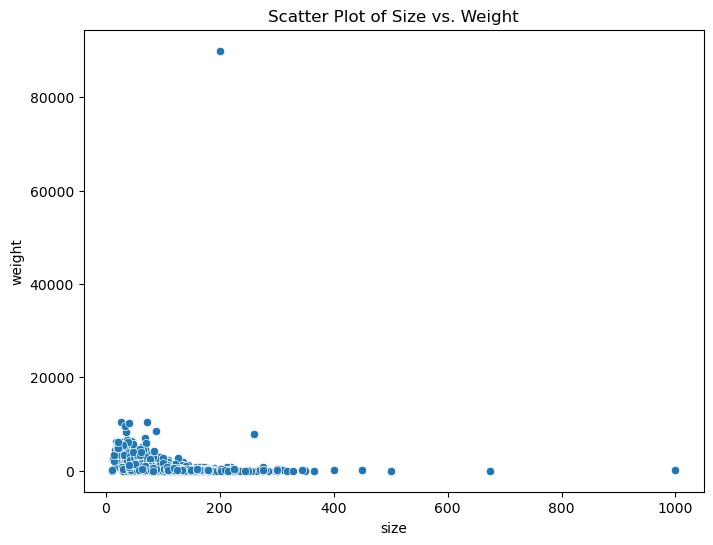

In [12]:
#finding outliers

plt.figure(figsize=(8, 6))
sns.scatterplot(x='size', y='weight', data=harvests)
plt.title('Scatter Plot of Size vs. Weight')
plt.show()

In [13]:
from scipy import stats
z_scores_weight = stats.zscore(harvests['weight'])
weight_outliers = harvests[(np.abs(z_scores_weight) > 3)]
print("Outliers in harvests:")
print(weight_outliers)

Outliers in harvests:
      cycle_id    size    weight       id harvested_at status
117      21023   88.00   8555.00  18671.0   2023-04-02   Full
262      16332   26.53  10369.10  13069.0   2022-09-09   Full
280       9098  200.00  90000.00  12432.0   2022-07-19   Full
784      17743   35.00   8310.42  14888.0   2022-12-04   Full
1191      9105   34.00   9513.60  14149.0   2022-10-10   Full
1213     18675   72.35  10356.59   9383.0   2022-01-08   Full
1438     19370   40.00  10300.00  13024.0   2022-08-25   Full


In [14]:
z_scores_size = stats.zscore(harvests['size'])
size_outliers = harvests[(np.abs(z_scores_size) > 3)]
print("Outliers in harvests:")
print(size_outliers)

Outliers in harvests:
      cycle_id    size  weight       id harvested_at   status
63       15067   350.0   84.00  16923.0   2023-03-24  Partial
64       15067   350.0  173.00  17097.0   2023-04-02     Full
77       15017   296.8    0.40  10446.0   2022-04-09  Partial
101      16626   450.0   95.00  17592.0   2023-04-26     Full
111      15511   304.0  262.46  11312.0   2022-06-30     Full
123      16331   300.0   17.00  11588.0   2022-06-23     Full
133      15493   350.0  110.00  17134.0   2023-04-04     Full
160      19855   284.0    0.41  10440.0   2022-04-09  Partial
165      18223   675.0    0.00  14432.0   2022-10-20   Failed
205      18233   400.0   50.00  17117.0   2023-04-03  Partial
206      18233   310.0  110.00  17291.0   2023-04-12  Partial
376      14577   365.5    0.20  10437.0   2022-04-09  Partial
487      12864   318.5    0.25  10459.0   2022-04-12  Partial
612      18446   300.0   18.00  18786.0   2023-05-29     Full
769      19319   300.0   19.00  13610.0   2022-1

In [15]:
# Drop outliers dari kolom 'weight' 
harvests = harvests.drop(weight_outliers.index)
harvests = harvests.drop(size_outliers.index)
harvests.head()

,cycle_id,size,weight,id,harvested_at,status
0,15308,119.78,481.20,15542.0,2023-01-03,Partial
1,15308,119.78,65.54,15543.0,2023-01-03,Partial
2,15308,63.42,111.66,15919.0,2023-01-21,Partial
3,15308,113.57,180.09,15920.0,2023-01-21,Partial
4,15308,113.57,346.57,15921.0,2023-01-21,Partial


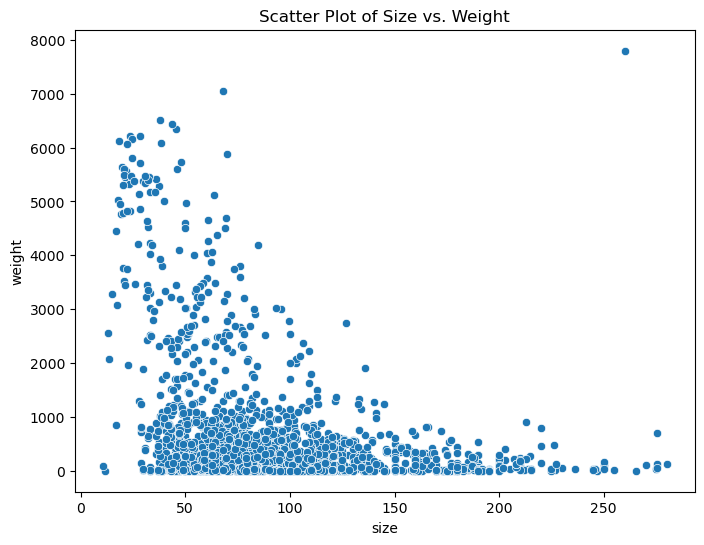

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='size', y='weight', data=harvests)
plt.title('Scatter Plot of Size vs. Weight')
plt.show()

### Ponds Dataset

In [53]:
ponds.head()

,id,farm_id,length,width,deep
0,16053,7941,49.27,36.96,2.0
1,30350,8409,20.00,15.70,1.2
2,32206,8368,40.00,15.00,1.0
3,34710,8470,70.71,70.71,1.5
4,32214,9044,36.51,27.39,1.4


In [55]:
ponds.describe()

,id,farm_id,length,width,deep
count,427.000000,427.000000,427.000000,427.000000,427.000000
mean,28737.714286,8084.782201,46.476230,38.799016,3.472553
std,9545.166358,2130.115944,18.705619,15.124178,17.516078
min,1.000000,3.000000,3.000000,2.000000,0.700000
25%,21963.500000,8294.500000,33.000000,30.000000,1.200000
50%,32248.000000,8470.000000,46.190000,38.220000,1.300000
75%,34730.500000,9225.000000,56.600000,46.915000,1.500000
max,40876.000000,10967.000000,222.500000,70.710000,150.000000


In [57]:
ponds['wideness'] = ponds['length'] * ponds['width']
ponds

,id,farm_id,length,width,deep,wideness
0,16053,7941,49.27,36.96,2.0,1821.0192
1,30350,8409,20.00,15.70,1.2,314.0000
2,32206,8368,40.00,15.00,1.0,600.0000
3,34710,8470,70.71,70.71,1.5,4999.9041
4,32214,9044,36.51,27.39,1.4,1000.0089
...,...,...,...,...,...,...
426,3,8333,36.20,46.40,1.1,1679.6800
427,34726,8470,70.71,70.71,1.5,4999.9041
428,37103,8699,30.00,27.00,1.5,810.0000
429,38592,8375,30.00,18.00,1.0,540.0000


### Farms Dataset


In [115]:
farms

,id,province,regency,timezone
0,3,JAWA TENGAH,PURWOREJO,+07:00
1,869,SULAWESI SELATAN,BARRU,+08:00
2,1000,JAWA TIMUR,SITUBONDO,+07:00
3,1662,JAWA TIMUR,BANYUWANGI,+07:00
4,1739,LAMPUNG,LAMPUNG BARAT,+07:00
...,...,...,...,...
153,10325,SULAWESI TENGAH,DONGGALA,+08:00
154,10326,SULAWESI TENGAH,DONGGALA,+08:00
155,10465,KEPULAUAN BANGKA BELITUNG,BANGKA SELATAN,+07:00
156,10605,JAWA TIMUR,PACITAN,+07:00


In [116]:
farms.rename(columns={'id': 'farm_id'}, inplace=True)
farms

,farm_id,province,regency,timezone
0,3,JAWA TENGAH,PURWOREJO,+07:00
1,869,SULAWESI SELATAN,BARRU,+08:00
2,1000,JAWA TIMUR,SITUBONDO,+07:00
3,1662,JAWA TIMUR,BANYUWANGI,+07:00
4,1739,LAMPUNG,LAMPUNG BARAT,+07:00
...,...,...,...,...
153,10325,SULAWESI TENGAH,DONGGALA,+08:00
154,10326,SULAWESI TENGAH,DONGGALA,+08:00
155,10465,KEPULAUAN BANGKA BELITUNG,BANGKA SELATAN,+07:00
156,10605,JAWA TIMUR,PACITAN,+07:00


In [119]:
# Merge kolom province dari farms ke ponds
ponds = ponds.merge(farms[['farm_id', 'province']], on='farm_id', how='left')
ponds

,id,farm_id,length,width,deep,wideness,province
0,16053,7941,49.27,36.96,2.0,1821.0192,JAWA TIMUR
1,30350,8409,20.00,15.70,1.2,314.0000,NaN
2,32206,8368,40.00,15.00,1.0,600.0000,BALI
3,34710,8470,70.71,70.71,1.5,4999.9041,JAWA TENGAH
4,32214,9044,36.51,27.39,1.4,1000.0089,JAWA TIMUR
...,...,...,...,...,...,...,...
422,3,8333,36.20,46.40,1.1,1679.6800,JAWA TENGAH
423,34726,8470,70.71,70.71,1.5,4999.9041,JAWA TENGAH
424,37103,8699,30.00,27.00,1.5,810.0000,NaN
425,38592,8375,30.00,18.00,1.0,540.0000,NaN


### Calculating Survival Rate (SR)

In [17]:
# Menghitung Jumlah Populasi Saat Dipanen
# Jumlah populasi = total bobot panen (kg) / ukuran (per kg)
harvests['total_pop'] = round(harvests['weight'] * harvests['size'],2)
harvests.head()

,cycle_id,size,weight,id,harvested_at,status,total_pop
0,15308,119.78,481.20,15542.0,2023-01-03,Partial,57638.14
1,15308,119.78,65.54,15543.0,2023-01-03,Partial,7850.38
2,15308,63.42,111.66,15919.0,2023-01-21,Partial,7081.48
3,15308,113.57,180.09,15920.0,2023-01-21,Partial,20452.82
4,15308,113.57,346.57,15921.0,2023-01-21,Partial,39359.95


In [18]:
# Menghitung Jumlah Penduduk tiap cycle_id
harvests['total_pop_per_cycle'] = harvests.groupby('cycle_id')['total_pop'].transform('sum')

# Kita ingin mengambil Total Populasi untuk setiap cycle_id pertama yang muncul
harvests['total_pop_first_cycle'] = harvests.loc[~harvests['cycle_id'].duplicated(), 'total_pop_per_cycle']

In [19]:
harvests

,cycle_id,size,weight,id,harvested_at,status,total_pop,total_pop_per_cycle,total_pop_first_cycle
0,15308,119.78,481.20,15542.0,2023-01-03,Partial,57638.14,234796.44,234796.44
1,15308,119.78,65.54,15543.0,2023-01-03,Partial,7850.38,234796.44,NaN
2,15308,63.42,111.66,15919.0,2023-01-21,Partial,7081.48,234796.44,NaN
3,15308,113.57,180.09,15920.0,2023-01-21,Partial,20452.82,234796.44,NaN
4,15308,113.57,346.57,15921.0,2023-01-21,Partial,39359.95,234796.44,NaN
...,...,...,...,...,...,...,...,...,...
1865,19484,180.00,60.00,17100.0,2023-03-29,Partial,10800.00,65200.00,65200.00
1866,19484,160.00,340.00,17101.0,2023-04-02,Full,54400.00,65200.00,NaN
1867,18604,125.00,205.00,13722.0,2022-10-10,Full,25625.00,25625.00,25625.00
1868,20615,22.10,6064.00,16516.0,2023-02-22,Full,134014.40,134014.40,134014.40


In [20]:
# Menghitung Survival Rate setelah panen
# SR = total population per cycle / total seed
merged_df = cycles.merge(harvests[['cycle_id','status', 'total_pop_per_cycle']], left_on='id', right_on='cycle_id')
merged_df['SR'] = (merged_df['total_pop_per_cycle'] / merged_df['total_seed']) * 100

In [21]:
merged_df

,id,pond_id,total_seed,started_at,finished_at,area,cycle_duration_days,cycle_id,status,total_pop_per_cycle,SR
0,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,18360,Partial,262363.85,65.590962
1,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,18360,Partial,262363.85,65.590962
2,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,18360,Partial,262363.85,65.590962
3,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,18360,Partial,262363.85,65.590962
4,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,18360,Partial,262363.85,65.590962
...,...,...,...,...,...,...,...,...,...,...,...
1819,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,15066,Partial,238565.94,76.341101
1820,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,15066,Partial,238565.94,76.341101
1821,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,15066,Full,238565.94,76.341101
1822,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,15066,Full,238565.94,76.341101


In [22]:
merged_df['SR'] = round(merged_df['SR'], 2)
merged_df

,id,pond_id,total_seed,started_at,finished_at,area,cycle_duration_days,cycle_id,status,total_pop_per_cycle,SR
0,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,18360,Partial,262363.85,65.59
1,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,18360,Partial,262363.85,65.59
2,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,18360,Partial,262363.85,65.59
3,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,18360,Partial,262363.85,65.59
4,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,18360,Partial,262363.85,65.59
...,...,...,...,...,...,...,...,...,...,...,...
1819,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,15066,Partial,238565.94,76.34
1820,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,15066,Partial,238565.94,76.34
1821,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,15066,Full,238565.94,76.34
1822,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,15066,Full,238565.94,76.34


In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   1824 non-null   int64         
 1   pond_id              1824 non-null   int64         
 2   total_seed           1824 non-null   int64         
 3   started_at           1824 non-null   datetime64[ns]
 4   finished_at          1824 non-null   datetime64[ns]
 5   area                 1824 non-null   float64       
 6   cycle_duration_days  1824 non-null   int64         
 7   cycle_id             1824 non-null   int64         
 8   status               1824 non-null   object        
 9   total_pop_per_cycle  1824 non-null   float64       
 10  SR                   1824 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(5), object(1)
memory usage: 156.9+ KB


In [24]:
merged_df.describe()

,id,pond_id,total_seed,started_at,finished_at,area,cycle_duration_days,cycle_id,total_pop_per_cycle,SR
count,1824.000000,1824.000000,1.824000e+03,1824,1824,1824.000000,1824.000000,1824.000000,1.824000e+03,1824.000000
mean,17983.548246,27448.963816,2.584047e+05,2022-08-05 00:15:47.368421120,2022-11-04 05:55:15.789473792,1991.720658,91.235746,17983.548246,1.997130e+05,76.786743
min,7615.000000,1.000000,1.272000e+03,2018-06-08 00:00:00,2018-09-26 00:00:00,7.000000,19.000000,7615.000000,5.900000e+01,0.390000
25%,16166.500000,20911.000000,1.600000e+05,2022-05-13 00:00:00,2022-08-01 00:00:00,1000.000000,76.750000,16166.500000,1.047768e+05,59.392500
50%,18427.000000,32180.000000,2.816000e+05,2022-09-10 00:00:00,2022-12-21 00:00:00,1600.000000,92.000000,18427.000000,1.942291e+05,82.010000
75%,19803.000000,36818.000000,3.250000e+05,2022-11-18 00:00:00,2023-02-19 00:00:00,2500.000000,107.250000,19803.000000,2.878468e+05,94.610000
max,23531.000000,40388.000000,1.377414e+06,2023-05-16 00:00:00,2023-07-11 00:00:00,40000.000000,220.000000,23531.000000,2.028000e+06,338.000000
std,2765.707418,11032.997838,1.319916e+05,NaN,NaN,2650.435856,20.464741,2765.707418,1.246880e+05,31.816157


In [25]:
# Menemukan nilai SR lebih dari 100%
sr_above_100 = merged_df[merged_df['SR'] > 100][['cycle_id', 'SR']]
print(sr_above_100)

      cycle_id      SR
9        19049  110.73
10       19049  110.73
11       19049  110.73
12       19049  110.73
13       19049  110.73
...        ...     ...
1810     19874  100.57
1811     19874  100.57
1812     19874  100.57
1813     17563  115.47
1814     17563  115.47

[352 rows x 2 columns]


Terlihat ada 352 baris yang menunjukkan bahwa kita mempunyai Survival Rate lebih dari 100%. Oleh karena itu, tindakan terbaik adalah mengecualikannya dari kumpulan data.

In [26]:
merged_df = merged_df[merged_df['SR'] <= 100]
merged_df.describe()

,id,pond_id,total_seed,started_at,finished_at,area,cycle_duration_days,cycle_id,total_pop_per_cycle,SR
count,1472.000000,1472.000000,1.472000e+03,1472,1472,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,17819.184783,26993.793478,2.666913e+05,2022-07-24 20:10:06.521739008,2022-10-23 19:15:19.565217280,2029.418064,90.961957,17819.184783,185452.971807,67.183995
min,7615.000000,1.000000,1.272000e+03,2018-06-08 00:00:00,2018-09-26 00:00:00,7.000000,35.000000,7615.000000,59.000000,0.390000
25%,16124.750000,20909.000000,1.778000e+05,2022-05-02 06:00:00,2022-07-22 00:00:00,1056.000000,78.000000,16124.750000,87695.560000,52.740000
50%,18232.000000,31466.000000,2.818840e+05,2022-08-20 00:00:00,2022-11-04 12:00:00,1700.075000,91.000000,18232.000000,184590.215000,73.325000
75%,19686.000000,36087.000000,3.250000e+05,2022-11-18 00:00:00,2023-02-19 00:00:00,2500.000000,106.000000,19686.000000,269733.040000,86.670000
max,23531.000000,39889.000000,1.377414e+06,2023-05-15 00:00:00,2023-07-11 00:00:00,40000.000000,220.000000,23531.000000,743216.080000,99.250000
std,2706.944678,11065.292529,1.366463e+05,NaN,NaN,2288.073441,20.040032,2706.944678,113733.040852,24.121036


In [27]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1472 entries, 0 to 1823
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   1472 non-null   int64         
 1   pond_id              1472 non-null   int64         
 2   total_seed           1472 non-null   int64         
 3   started_at           1472 non-null   datetime64[ns]
 4   finished_at          1472 non-null   datetime64[ns]
 5   area                 1472 non-null   float64       
 6   cycle_duration_days  1472 non-null   int64         
 7   cycle_id             1472 non-null   int64         
 8   status               1472 non-null   object        
 9   total_pop_per_cycle  1472 non-null   float64       
 10  SR                   1472 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(5), object(1)
memory usage: 138.0+ KB


Kami ingin menetapkan setiap Tingkat Kelangsungan Hidup ke setiap cycle_id.

In [28]:
merged_df = merged_df.drop_duplicates(subset='cycle_id')
merged_df

,id,pond_id,total_seed,started_at,finished_at,area,cycle_duration_days,cycle_id,status,total_pop_per_cycle,SR
0,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,18360,Partial,262363.85,65.59
6,14583,31451,155792,2022-05-15,2022-07-23,1000.0,69,14583,Full,40180.73,25.79
16,16334,7369,400200,2022-09-19,2023-01-21,2820.0,124,16334,Partial,373283.77,93.27
20,18740,31447,169702,2022-05-15,2022-07-23,1000.0,69,18740,Full,16535.42,9.74
21,19518,32214,150000,2022-07-28,2022-09-30,1000.0,64,19518,Full,55900.00,37.27
...,...,...,...,...,...,...,...,...,...,...,...
1798,17532,31256,270900,2022-03-30,2022-06-10,1881.0,72,17532,Full,191973.80,70.87
1803,19318,32370,100000,2022-05-25,2022-09-03,1600.0,101,19318,Full,78400.00,78.40
1804,15219,31478,202742,2022-06-03,2022-08-05,1000.0,63,15219,Full,27757.56,13.69
1815,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,15066,Partial,238565.94,76.34


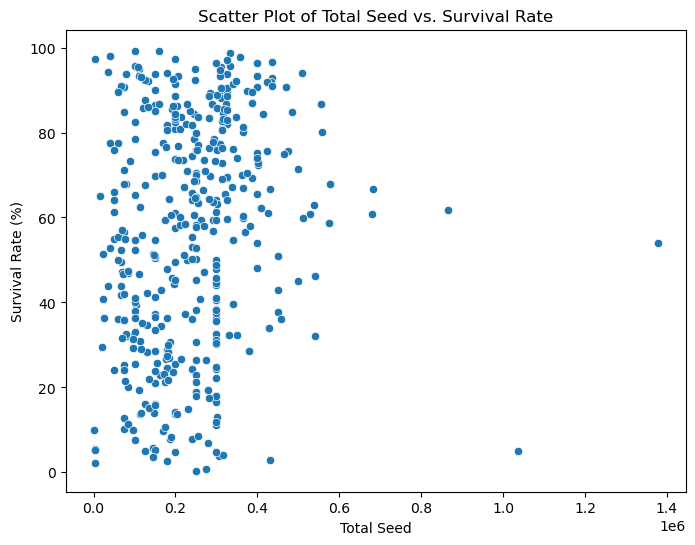

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_seed', y='SR', data=merged_df)
plt.title('Scatter Plot of Total Seed vs. Survival Rate')
plt.xlabel('Total Seed')
plt.ylabel('Survival Rate (%)')
plt.show()

### Calculating Average Daily Gain (ADG)

In [30]:
# Calculating ADG (Average Daily Gain)
# Mengelompokkan sampel berdasarkan cycle_id-nya dan menghitung bobot rata-rata
samplings_grouped = samplings.groupby('cycle_id').agg({'average_weight': 'mean'}).reset_index()
samplings_grouped

,cycle_id,average_weight
0,7615,16.146842
1,7616,7.496000
2,9090,8.624286
3,9091,4.250000
4,9094,4.100000
...,...,...
482,22813,7.140833
483,23359,4.968333
484,23362,16.190000
485,23529,7.321000


In [31]:
# Menggabungkan data siklus dengan data pengambilan sampel
cycles_with_adg = cycles.merge(samplings_grouped, left_on='id', right_on='cycle_id')
cycles_with_adg

,id,pond_id,total_seed,started_at,finished_at,area,cycle_duration_days,cycle_id,average_weight
0,18360,33945,400000,2022-12-01,2023-02-17,699.90,78,18360,7.837143
1,14583,31451,155792,2022-05-15,2022-07-23,1000.00,69,14583,4.582500
2,19049,13249,175000,2022-06-30,2022-10-12,2256.25,104,19049,11.670000
3,16334,7369,400200,2022-09-19,2023-01-21,2820.00,124,16334,6.194000
4,18740,31447,169702,2022-05-15,2022-07-23,1000.00,69,18740,3.545000
...,...,...,...,...,...,...,...,...,...
488,19874,13252,200000,2022-11-29,2023-02-27,1949.86,90,19874,10.055714
489,17563,32637,154923,2022-05-13,2022-07-24,2025.00,72,17563,5.515000
490,15066,21960,312500,2021-04-07,2021-07-29,2500.00,113,15066,10.876429
491,15106,30788,24000,2022-03-04,2022-04-19,75.00,46,15106,4.800000


In [32]:
# Calculating ADG
cycles_with_adg['ADG'] = round(cycles_with_adg['average_weight'] / cycles_with_adg['cycle_duration_days'], 2)
cycles_with_adg

,id,pond_id,total_seed,started_at,finished_at,area,cycle_duration_days,cycle_id,average_weight,ADG
0,18360,33945,400000,2022-12-01,2023-02-17,699.90,78,18360,7.837143,0.10
1,14583,31451,155792,2022-05-15,2022-07-23,1000.00,69,14583,4.582500,0.07
2,19049,13249,175000,2022-06-30,2022-10-12,2256.25,104,19049,11.670000,0.11
3,16334,7369,400200,2022-09-19,2023-01-21,2820.00,124,16334,6.194000,0.05
4,18740,31447,169702,2022-05-15,2022-07-23,1000.00,69,18740,3.545000,0.05
...,...,...,...,...,...,...,...,...,...,...
488,19874,13252,200000,2022-11-29,2023-02-27,1949.86,90,19874,10.055714,0.11
489,17563,32637,154923,2022-05-13,2022-07-24,2025.00,72,17563,5.515000,0.08
490,15066,21960,312500,2021-04-07,2021-07-29,2500.00,113,15066,10.876429,0.10
491,15106,30788,24000,2022-03-04,2022-04-19,75.00,46,15106,4.800000,0.10


### Calculating Feed Conversion Rate (FCR)

In [33]:
feeds.head()

,cycle_id,logged_at,quantity
0,15308,2022-11-02 00:00:00.000,2.11
1,15308,2022-11-02 03:30:00.000,2.11
2,15308,2022-11-02 05:30:00.000,2.11
3,15308,2022-11-03 00:00:00.000,2.32
4,15308,2022-11-03 03:30:00.000,2.32


In [34]:
feeds.describe()

,cycle_id,quantity
count,143879.000000,143879.000000
mean,17934.966548,13.666508
std,2790.715304,21.761498
min,7615.000000,-1.000000
25%,16091.000000,3.500000
50%,18403.000000,7.500000
75%,19688.000000,16.000000
max,23531.000000,423.000000



Kami ingin menghilangkan kuantitas yang mengandung nilai negatif dan juga memeriksa outlier karena kami memiliki nilai jumlah maksimum 423 kg.

In [35]:
# Hilangkan nilai negatif atau sama dengan 0
feeds = feeds[feeds['quantity'] > 0.1]
feeds.describe()

,cycle_id,quantity
count,141400.000000,141400.000000
mean,17943.301033,13.905450
std,2793.389339,21.875822
min,7615.000000,0.102000
25%,16136.000000,3.600000
50%,18405.000000,8.000000
75%,19688.000000,16.000000
max,23531.000000,423.000000


In [36]:
z_scores_quantity = stats.zscore(feeds['quantity'])
qty_outliers = feeds[(np.abs(z_scores_quantity) > 3)]
print("Outliers in quantity:")
qty_outliers

Outliers in quantity:


,cycle_id,logged_at,quantity
1879,14822,2022-06-30 02:00:00.000,84.0
1880,14822,2022-07-01 02:00:00.000,84.0
1881,14822,2022-07-02 02:00:00.000,84.0
1885,14822,2022-07-06 02:00:00.000,80.0
1886,14822,2022-07-07 02:00:00.000,80.0
...,...,...,...
140108,9106,2022-10-14 02:00:00.000,85.0
140109,9106,2022-10-15 02:00:00.000,90.0
140110,9106,2022-10-16 02:00:00.000,90.0
140111,9106,2022-10-17 02:00:00.000,90.0


In [37]:
feeds = feeds.drop(qty_outliers.index)
feeds

,cycle_id,logged_at,quantity
0,15308,2022-11-02 00:00:00.000,2.11
1,15308,2022-11-02 03:30:00.000,2.11
2,15308,2022-11-02 05:30:00.000,2.11
3,15308,2022-11-03 00:00:00.000,2.32
4,15308,2022-11-03 03:30:00.000,2.32
...,...,...,...
143878,19808,2022-11-03 10:00:00.000,6.00
143879,19808,2022-11-03 23:30:22.000,5.50
143881,19808,2022-11-04 03:00:00.000,5.50
143882,19808,2022-11-04 06:30:00.000,5.50


In [38]:
feeds.describe()

,cycle_id,quantity
count,138079.000000,138079.000000
mean,17960.039014,11.301141
std,2789.363064,11.760237
min,7615.000000,0.102000
25%,16136.000000,3.500000
50%,18405.000000,7.500000
75%,19692.000000,15.000000
max,23531.000000,79.500000


In [39]:
# Calculate total feed per cycle
total_feed_per_cycle = feeds.groupby('cycle_id')['quantity'].sum().reset_index()
total_harvest = harvests.groupby('cycle_id')['weight'].sum().reset_index()

In [40]:
# FCR = total feed quantity (kg) / total harvest weight (kg)
fcr_data = pd.merge(total_feed_per_cycle, total_harvest, on='cycle_id', suffixes=('_feed', '_harvest'))
fcr_data['FCR'] = fcr_data['quantity'] / fcr_data['weight']
fcr_data

,cycle_id,quantity,weight,FCR
0,7615,10619.000,5472.00,1.940607
1,7616,1416.500,700.00,2.023571
2,9090,8397.000,5639.00,1.489094
3,9091,819.500,268.20,3.055556
4,9094,136.900,115.00,1.190435
...,...,...,...,...
478,22813,6218.500,5293.20,1.174809
479,23359,1967.000,3517.08,0.559271
480,23362,1671.100,245.92,6.795299
481,23529,4096.222,2736.54,1.496862


In [41]:
fcr_data.describe()

,cycle_id,quantity,weight,FCR
count,483.000000,483.000000,483.000000,483.000000
mean,17762.993789,3168.426019,2419.326149,2.156361
std,2817.320587,2646.735527,2103.006121,3.953099
min,7615.000000,0.555000,2.560000,0.019337
25%,16077.500000,1198.000000,576.650000,1.134187
50%,18232.000000,2323.800000,2000.000000,1.552872
75%,19646.500000,4635.695000,3738.035000,2.057512
max,23531.000000,13446.500000,13397.600000,53.566667


### Merging the dataset of SR, ADG, and FCR

In [42]:
merged_df.columns

Index(['id', 'pond_id', 'total_seed', 'started_at', 'finished_at', 'area',
       'cycle_duration_days', 'cycle_id', 'status', 'total_pop_per_cycle',
       'SR'],
      dtype='object')

In [43]:
merged_df

,id,pond_id,total_seed,started_at,finished_at,area,cycle_duration_days,cycle_id,status,total_pop_per_cycle,SR
0,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,18360,Partial,262363.85,65.59
6,14583,31451,155792,2022-05-15,2022-07-23,1000.0,69,14583,Full,40180.73,25.79
16,16334,7369,400200,2022-09-19,2023-01-21,2820.0,124,16334,Partial,373283.77,93.27
20,18740,31447,169702,2022-05-15,2022-07-23,1000.0,69,18740,Full,16535.42,9.74
21,19518,32214,150000,2022-07-28,2022-09-30,1000.0,64,19518,Full,55900.00,37.27
...,...,...,...,...,...,...,...,...,...,...,...
1798,17532,31256,270900,2022-03-30,2022-06-10,1881.0,72,17532,Full,191973.80,70.87
1803,19318,32370,100000,2022-05-25,2022-09-03,1600.0,101,19318,Full,78400.00,78.40
1804,15219,31478,202742,2022-06-03,2022-08-05,1000.0,63,15219,Full,27757.56,13.69
1815,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,15066,Partial,238565.94,76.34


In [44]:
# Merge ADG ke merged_df
merged_with_adg = merged_df.merge(cycles_with_adg[['cycle_id', 'ADG']], on='cycle_id', how='left')

# Merge FCR ke dataframe baru
final_merged_df = merged_with_adg.merge(fcr_data[['cycle_id', 'FCR']], on='cycle_id', how='left')

final_merged_df

,id,pond_id,total_seed,started_at,finished_at,area,cycle_duration_days,cycle_id,status,total_pop_per_cycle,SR,ADG,FCR
0,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,18360,Partial,262363.85,65.59,0.10,1.629570
1,14583,31451,155792,2022-05-15,2022-07-23,1000.0,69,14583,Full,40180.73,25.79,0.07,1.846418
2,16334,7369,400200,2022-09-19,2023-01-21,2820.0,124,16334,Partial,373283.77,93.27,0.05,1.562297
3,18740,31447,169702,2022-05-15,2022-07-23,1000.0,69,18740,Full,16535.42,9.74,0.05,3.876951
4,19518,32214,150000,2022-07-28,2022-09-30,1000.0,64,19518,Full,55900.00,37.27,0.09,2.076860
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,17532,31256,270900,2022-03-30,2022-06-10,1881.0,72,17532,Full,191973.80,70.87,0.11,1.377563
423,19318,32370,100000,2022-05-25,2022-09-03,1600.0,101,19318,Full,78400.00,78.40,0.03,1.659000
424,15219,31478,202742,2022-06-03,2022-08-05,1000.0,63,15219,Full,27757.56,13.69,0.13,2.854010
425,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,15066,Partial,238565.94,76.34,0.10,1.601581


In [45]:
final_merged_df['FCR'] = round(final_merged_df['FCR'], 2)

In [47]:
final_merged_df.isnull().sum()

id                     0
pond_id                0
total_seed             0
started_at             0
finished_at            0
area                   0
cycle_duration_days    0
cycle_id               0
status                 0
total_pop_per_cycle    0
SR                     0
ADG                    9
FCR                    2
dtype: int64

In [48]:
final_merged_df = final_merged_df.dropna()
final_merged_df

,id,pond_id,total_seed,started_at,finished_at,area,cycle_duration_days,cycle_id,status,total_pop_per_cycle,SR,ADG,FCR
0,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,18360,Partial,262363.85,65.59,0.10,1.63
1,14583,31451,155792,2022-05-15,2022-07-23,1000.0,69,14583,Full,40180.73,25.79,0.07,1.85
2,16334,7369,400200,2022-09-19,2023-01-21,2820.0,124,16334,Partial,373283.77,93.27,0.05,1.56
3,18740,31447,169702,2022-05-15,2022-07-23,1000.0,69,18740,Full,16535.42,9.74,0.05,3.88
4,19518,32214,150000,2022-07-28,2022-09-30,1000.0,64,19518,Full,55900.00,37.27,0.09,2.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,17532,31256,270900,2022-03-30,2022-06-10,1881.0,72,17532,Full,191973.80,70.87,0.11,1.38
423,19318,32370,100000,2022-05-25,2022-09-03,1600.0,101,19318,Full,78400.00,78.40,0.03,1.66
424,15219,31478,202742,2022-06-03,2022-08-05,1000.0,63,15219,Full,27757.56,13.69,0.13,2.85
425,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,15066,Partial,238565.94,76.34,0.10,1.60


In [59]:
final_merged_df = final_merged_df.merge(ponds[['id', 'wideness']], left_on='pond_id', right_on='id', how='left')
final_merged_df

,id_x,pond_id,total_seed,started_at,finished_at,area,cycle_duration_days,cycle_id,status,total_pop_per_cycle,SR,ADG,FCR,id_y,wideness_x,id,wideness_y
0,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,18360,Partial,262363.85,65.59,0.10,1.63,33945.0,900.0000,33945.0,900.0000
1,14583,31451,155792,2022-05-15,2022-07-23,1000.0,69,14583,Full,40180.73,25.79,0.07,1.85,31451.0,1947.6912,31451.0,1947.6912
2,16334,7369,400200,2022-09-19,2023-01-21,2820.0,124,16334,Partial,373283.77,93.27,0.05,1.56,7369.0,2800.2130,7369.0,2800.2130
3,18740,31447,169702,2022-05-15,2022-07-23,1000.0,69,18740,Full,16535.42,9.74,0.05,3.88,31447.0,2118.1604,31447.0,2118.1604
4,19518,32214,150000,2022-07-28,2022-09-30,1000.0,64,19518,Full,55900.00,37.27,0.09,2.08,32214.0,1000.0089,32214.0,1000.0089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,17532,31256,270900,2022-03-30,2022-06-10,1881.0,72,17532,Full,191973.80,70.87,0.11,1.38,31256.0,1881.0000,31256.0,1881.0000
412,19318,32370,100000,2022-05-25,2022-09-03,1600.0,101,19318,Full,78400.00,78.40,0.03,1.66,32370.0,2500.0000,32370.0,2500.0000
413,15219,31478,202742,2022-06-03,2022-08-05,1000.0,63,15219,Full,27757.56,13.69,0.13,2.85,31478.0,1000.0000,31478.0,1000.0000
414,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,15066,Partial,238565.94,76.34,0.10,1.60,21960.0,2500.1420,21960.0,2500.1420


In [61]:
final_merged_df.drop(columns=['id', 'id_y', 'wideness_y', 'cycle_id'], inplace=True)
final_merged_df

,id_x,pond_id,total_seed,started_at,finished_at,area,cycle_duration_days,status,total_pop_per_cycle,SR,ADG,FCR,wideness_x
0,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,Partial,262363.85,65.59,0.10,1.63,900.0000
1,14583,31451,155792,2022-05-15,2022-07-23,1000.0,69,Full,40180.73,25.79,0.07,1.85,1947.6912
2,16334,7369,400200,2022-09-19,2023-01-21,2820.0,124,Partial,373283.77,93.27,0.05,1.56,2800.2130
3,18740,31447,169702,2022-05-15,2022-07-23,1000.0,69,Full,16535.42,9.74,0.05,3.88,2118.1604
4,19518,32214,150000,2022-07-28,2022-09-30,1000.0,64,Full,55900.00,37.27,0.09,2.08,1000.0089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,17532,31256,270900,2022-03-30,2022-06-10,1881.0,72,Full,191973.80,70.87,0.11,1.38,1881.0000
412,19318,32370,100000,2022-05-25,2022-09-03,1600.0,101,Full,78400.00,78.40,0.03,1.66,2500.0000
413,15219,31478,202742,2022-06-03,2022-08-05,1000.0,63,Full,27757.56,13.69,0.13,2.85,1000.0000
414,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,Partial,238565.94,76.34,0.10,1.60,2500.1420


In [62]:
final_merged_df.rename(columns={'id_x': 'cycle_id'}, inplace=True)
final_merged_df
                            

,cycle_id,pond_id,total_seed,started_at,finished_at,area,cycle_duration_days,status,total_pop_per_cycle,SR,ADG,FCR,wideness_x
0,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,Partial,262363.85,65.59,0.10,1.63,900.0000
1,14583,31451,155792,2022-05-15,2022-07-23,1000.0,69,Full,40180.73,25.79,0.07,1.85,1947.6912
2,16334,7369,400200,2022-09-19,2023-01-21,2820.0,124,Partial,373283.77,93.27,0.05,1.56,2800.2130
3,18740,31447,169702,2022-05-15,2022-07-23,1000.0,69,Full,16535.42,9.74,0.05,3.88,2118.1604
4,19518,32214,150000,2022-07-28,2022-09-30,1000.0,64,Full,55900.00,37.27,0.09,2.08,1000.0089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,17532,31256,270900,2022-03-30,2022-06-10,1881.0,72,Full,191973.80,70.87,0.11,1.38,1881.0000
412,19318,32370,100000,2022-05-25,2022-09-03,1600.0,101,Full,78400.00,78.40,0.03,1.66,2500.0000
413,15219,31478,202742,2022-06-03,2022-08-05,1000.0,63,Full,27757.56,13.69,0.13,2.85,1000.0000
414,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,Partial,238565.94,76.34,0.10,1.60,2500.1420


In [63]:
final_merged_df.rename(columns={'wideness_x': 'wideness'}, inplace=True)
final_merged_df

,cycle_id,pond_id,total_seed,started_at,finished_at,area,cycle_duration_days,status,total_pop_per_cycle,SR,ADG,FCR,wideness
0,18360,33945,400000,2022-12-01,2023-02-17,699.9,78,Partial,262363.85,65.59,0.10,1.63,900.0000
1,14583,31451,155792,2022-05-15,2022-07-23,1000.0,69,Full,40180.73,25.79,0.07,1.85,1947.6912
2,16334,7369,400200,2022-09-19,2023-01-21,2820.0,124,Partial,373283.77,93.27,0.05,1.56,2800.2130
3,18740,31447,169702,2022-05-15,2022-07-23,1000.0,69,Full,16535.42,9.74,0.05,3.88,2118.1604
4,19518,32214,150000,2022-07-28,2022-09-30,1000.0,64,Full,55900.00,37.27,0.09,2.08,1000.0089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,17532,31256,270900,2022-03-30,2022-06-10,1881.0,72,Full,191973.80,70.87,0.11,1.38,1881.0000
412,19318,32370,100000,2022-05-25,2022-09-03,1600.0,101,Full,78400.00,78.40,0.03,1.66,2500.0000
413,15219,31478,202742,2022-06-03,2022-08-05,1000.0,63,Full,27757.56,13.69,0.13,2.85,1000.0000
414,15066,21960,312500,2021-04-07,2021-07-29,2500.0,113,Partial,238565.94,76.34,0.10,1.60,2500.1420


In [64]:
# Menampilkan daftar kolom yang ada
columns = list(final_merged_df.columns)

# Memindahkan kolom 'wideness' ke posisi ketiga
columns.insert(2, columns.pop(columns.index('wideness')))

# Mengatur ulang kolom pada DataFrame
final_merged_df = final_merged_df[columns]

# Menampilkan beberapa baris pertama untuk verifikasi
final_merged_df.head()

,cycle_id,pond_id,wideness,total_seed,started_at,finished_at,area,cycle_duration_days,status,total_pop_per_cycle,SR,ADG,FCR
0,18360,33945,900.0000,400000,2022-12-01,2023-02-17,699.9,78,Partial,262363.85,65.59,0.10,1.63
1,14583,31451,1947.6912,155792,2022-05-15,2022-07-23,1000.0,69,Full,40180.73,25.79,0.07,1.85
2,16334,7369,2800.2130,400200,2022-09-19,2023-01-21,2820.0,124,Partial,373283.77,93.27,0.05,1.56
3,18740,31447,2118.1604,169702,2022-05-15,2022-07-23,1000.0,69,Full,16535.42,9.74,0.05,3.88
4,19518,32214,1000.0089,150000,2022-07-28,2022-09-30,1000.0,64,Full,55900.00,37.27,0.09,2.08


In [66]:
final_merged_df.isnull().sum()

cycle_id               0
pond_id                0
wideness               4
total_seed             0
started_at             0
finished_at            0
area                   0
cycle_duration_days    0
status                 0
total_pop_per_cycle    0
SR                     0
ADG                    0
FCR                    0
dtype: int64

In [67]:
final_merged_df = final_merged_df.dropna()
final_merged_df

,cycle_id,pond_id,wideness,total_seed,started_at,finished_at,area,cycle_duration_days,status,total_pop_per_cycle,SR,ADG,FCR
0,18360,33945,900.0000,400000,2022-12-01,2023-02-17,699.9,78,Partial,262363.85,65.59,0.10,1.63
1,14583,31451,1947.6912,155792,2022-05-15,2022-07-23,1000.0,69,Full,40180.73,25.79,0.07,1.85
2,16334,7369,2800.2130,400200,2022-09-19,2023-01-21,2820.0,124,Partial,373283.77,93.27,0.05,1.56
3,18740,31447,2118.1604,169702,2022-05-15,2022-07-23,1000.0,69,Full,16535.42,9.74,0.05,3.88
4,19518,32214,1000.0089,150000,2022-07-28,2022-09-30,1000.0,64,Full,55900.00,37.27,0.09,2.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,17532,31256,1881.0000,270900,2022-03-30,2022-06-10,1881.0,72,Full,191973.80,70.87,0.11,1.38
412,19318,32370,2500.0000,100000,2022-05-25,2022-09-03,1600.0,101,Full,78400.00,78.40,0.03,1.66
413,15219,31478,1000.0000,202742,2022-06-03,2022-08-05,1000.0,63,Full,27757.56,13.69,0.13,2.85
414,15066,21960,2500.1420,312500,2021-04-07,2021-07-29,2500.0,113,Partial,238565.94,76.34,0.10,1.60


In [127]:
# Merge kolom province dari ponds ke final_merged_df berdasarkan kolom pond_id
final_merged_df = final_merged_df.merge(ponds[['id', 'province']], left_on='pond_id', right_on='id', how='left')
final_merged_df

,cycle_id,pond_id,wideness,total_seed,started_at,finished_at,area,cycle_duration_days,status,total_pop_per_cycle,SR,ADG,FCR,province_x,id,province_y
0,18360,33945,900.0000,400000,2022-12-01,2023-02-17,699.9,78,Partial,262363.85,65.59,0.10,1.63,JAWA TENGAH,33945,JAWA TENGAH
1,14583,31451,1947.6912,155792,2022-05-15,2022-07-23,1000.0,69,Full,40180.73,25.79,0.07,1.85,NaN,31451,NaN
2,16334,7369,2800.2130,400200,2022-09-19,2023-01-21,2820.0,124,Partial,373283.77,93.27,0.05,1.56,JAWA TENGAH,7369,JAWA TENGAH
3,18740,31447,2118.1604,169702,2022-05-15,2022-07-23,1000.0,69,Full,16535.42,9.74,0.05,3.88,NaN,31447,NaN
4,19518,32214,1000.0089,150000,2022-07-28,2022-09-30,1000.0,64,Full,55900.00,37.27,0.09,2.08,JAWA TIMUR,32214,JAWA TIMUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,17532,31256,1881.0000,270900,2022-03-30,2022-06-10,1881.0,72,Full,191973.80,70.87,0.11,1.38,JAWA BARAT,31256,JAWA BARAT
408,19318,32370,2500.0000,100000,2022-05-25,2022-09-03,1600.0,101,Full,78400.00,78.40,0.03,1.66,BALI,32370,BALI
409,15219,31478,1000.0000,202742,2022-06-03,2022-08-05,1000.0,63,Full,27757.56,13.69,0.13,2.85,JAWA BARAT,31478,JAWA BARAT
410,15066,21960,2500.1420,312500,2021-04-07,2021-07-29,2500.0,113,Partial,238565.94,76.34,0.10,1.60,SULAWESI SELATAN,21960,SULAWESI SELATAN


In [134]:
final_merged_df

,cycle_id,pond_id,wideness,total_seed,started_at,finished_at,area,cycle_duration_days,total_pop_per_cycle,SR,ADG,FCR,province
0,18360,33945,900.0000,400000,2022-12-01,2023-02-17,699.9,78,262363.85,65.59,0.10,1.63,JAWA TENGAH
1,14583,31451,1947.6912,155792,2022-05-15,2022-07-23,1000.0,69,40180.73,25.79,0.07,1.85,NaN
2,16334,7369,2800.2130,400200,2022-09-19,2023-01-21,2820.0,124,373283.77,93.27,0.05,1.56,JAWA TENGAH
3,18740,31447,2118.1604,169702,2022-05-15,2022-07-23,1000.0,69,16535.42,9.74,0.05,3.88,NaN
4,19518,32214,1000.0089,150000,2022-07-28,2022-09-30,1000.0,64,55900.00,37.27,0.09,2.08,JAWA TIMUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,17532,31256,1881.0000,270900,2022-03-30,2022-06-10,1881.0,72,191973.80,70.87,0.11,1.38,JAWA BARAT
408,19318,32370,2500.0000,100000,2022-05-25,2022-09-03,1600.0,101,78400.00,78.40,0.03,1.66,BALI
409,15219,31478,1000.0000,202742,2022-06-03,2022-08-05,1000.0,63,27757.56,13.69,0.13,2.85,JAWA BARAT
410,15066,21960,2500.1420,312500,2021-04-07,2021-07-29,2500.0,113,238565.94,76.34,0.10,1.60,SULAWESI SELATAN


#### **Analysis**

In [136]:
# ANOVA for SR by province
anova_sr_province = stats.f_oneway(
    *[group['SR'].values for name, group in final_merged_df.groupby('province')]
)
print(f"ANOVA SR by Province: {anova_sr_province}")

# ANOVA for ADG by province
anova_adg_province = stats.f_oneway(
    *[group['ADG'].values for name, group in final_merged_df.groupby('province')]
)
print(f"ANOVA ADG by Province: {anova_adg_province}")

# ANOVA for FCR by province
anova_fcr_province = stats.f_oneway(
    *[group['FCR'].values for name, group in final_merged_df.groupby('province')]
)
print(f"ANOVA FCR by Province: {anova_fcr_province}")

ANOVA SR by Province: F_onewayResult(statistic=4.211627694321597, pvalue=7.364269461617783e-06)
ANOVA ADG by Province: F_onewayResult(statistic=1.2179753071128738, pvalue=0.27341839260413275)
ANOVA FCR by Province: F_onewayResult(statistic=0.5703270746125164, pvalue=0.852711038208491)


ANOVA SR by Province -> Nilai p-value ini sangat kecil, jauh di bawah ambang batas umum 0.05, menunjukkan bahwa ada perbedaan yang signifikan secara statistik dalam tingkat kelangsungan hidup (Survival Rate atau SR) antara provinsi.

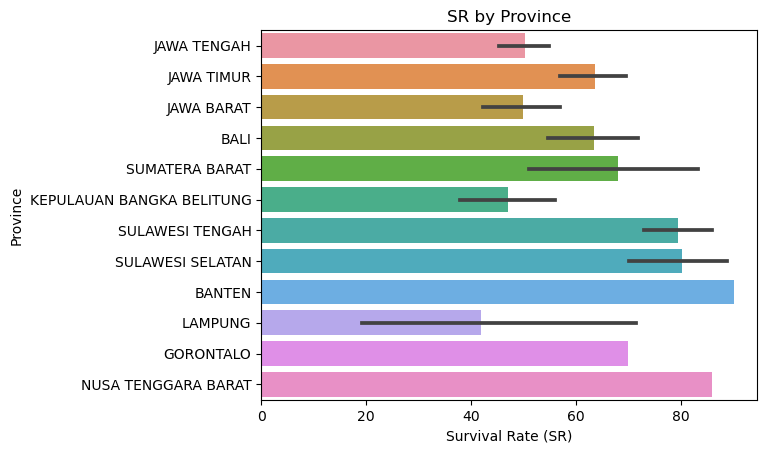

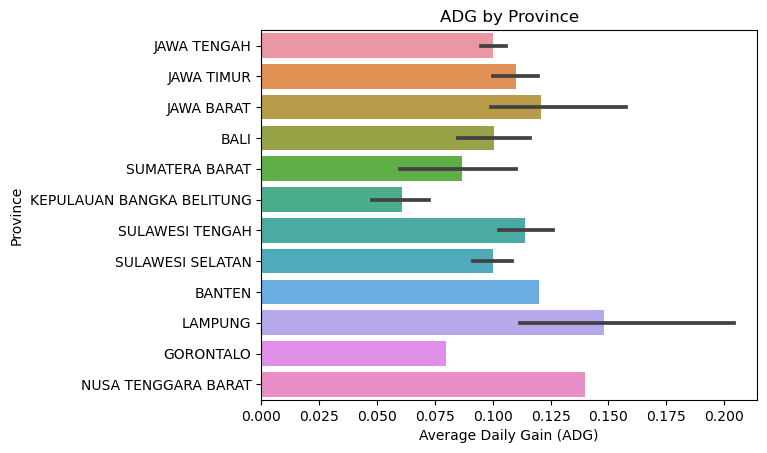

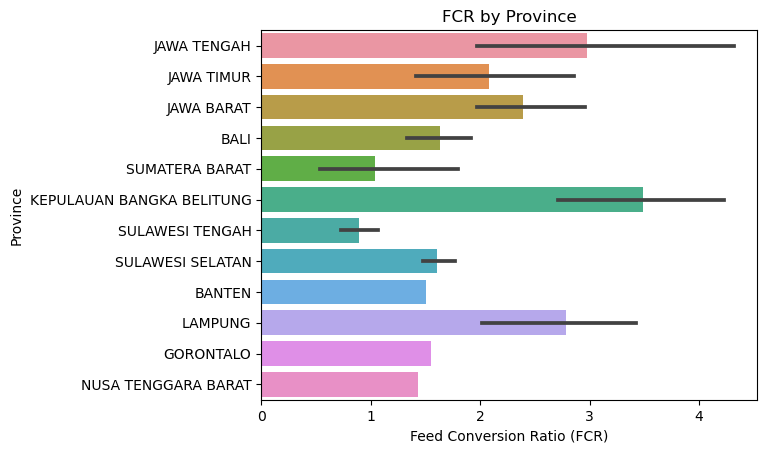

In [151]:
sns.barplot(y='province', x='SR', data=final_merged_df, orient='h')
plt.title('SR by Province')
plt.xlabel('Survival Rate (SR)')
plt.ylabel('Province')
plt.show()

sns.barplot(y='province', x='ADG', data=final_merged_df, orient='h')
plt.title('ADG by Province')
plt.xlabel('Average Daily Gain (ADG)')
plt.ylabel('Province')
plt.show()


sns.barplot(y='province', x='FCR', data=final_merged_df, orient='h')
plt.title('FCR by Province')
plt.xlabel('Feed Conversion Ratio (FCR)')
plt.ylabel('Province')
plt.show()

Dengan visualisasi ini, kita bisa melihat bagaimana SR, ADG, dan FCR bervariasi di antara berbagai provinsi, meskipun hasil ANOVA menunjukkan bahwa hanya SR yang memiliki perbedaan signifikan secara statistik antar provinsi.

In [149]:
# ANOVA untuk SR berdasarkan kolam
anova_sr_pond = stats.f_oneway(
    *[group['SR'].values for name, group in final_merged_df.groupby('wideness')]
)
print(f"ANOVA SR by Wideness: {anova_sr_pond}")

# ANOVA untuk ADG berdasarkan kolam
anova_adg_pond = stats.f_oneway(
    *[group['ADG'].values for name, group in final_merged_df.groupby('wideness')]
)
print(f"ANOVA ADG by Wideness: {anova_adg_pond}")

# ANOVA untuk FCR berdasarkan kolam
anova_fcr_pond = stats.f_oneway(
    *[group['FCR'].values for name, group in final_merged_df.groupby('wideness')]
)
print(f"ANOVA FCR by Wideness: {anova_fcr_pond}")

ANOVA SR by Wideness: F_onewayResult(statistic=1.9092343490917392, pvalue=1.9330001137248784e-06)
ANOVA ADG by Wideness: F_onewayResult(statistic=6.301114051282903, pvalue=7.894206990324895e-37)
ANOVA FCR by Wideness: F_onewayResult(statistic=0.598803132221029, pvalue=0.9998478443562787)


SR dan ADG menunjukkan perbedaan yang signifikan secara statistik berdasarkan luas kolam. Ini menunjukkan bahwa ukuran kolam mungkin memiliki pengaruh penting terhadap tingkat kelangsungan hidup dan pertumbuhan harian rata-rata udang.

In [145]:
# ANOVA untuk SR berdasarkan waktu budidaya
anova_sr_duration = stats.f_oneway(
    *[group['SR'].values for name, group in final_merged_df.groupby('cycle_duration_days')]
)
print(f"ANOVA SR by Cycle Duration: {anova_sr_duration}")

# ANOVA untuk ADG berdasarkan waktu budidaya
anova_adg_duration = stats.f_oneway(
    *[group['ADG'].values for name, group in final_merged_df.groupby('cycle_duration_days')]
)
print(f"ANOVA ADG by Cycle Duration: {anova_adg_duration}")

# ANOVA untuk FCR berdasarkan waktu budidaya
anova_fcr_duration = stats.f_oneway(
    *[group['FCR'].values for name, group in final_merged_df.groupby('cycle_duration_days')]
)
print(f"ANOVA FCR by Cycle Duration: {anova_fcr_duration}")


ANOVA SR by Cycle Duration: F_onewayResult(statistic=1.676909914831407, pvalue=0.0005265907527895708)
ANOVA ADG by Cycle Duration: F_onewayResult(statistic=0.5806916323445691, pvalue=0.9989409645857007)
ANOVA FCR by Cycle Duration: F_onewayResult(statistic=1.1010169446584734, pvalue=0.2697269610988022)


Terdapat perbedaan yang signifikan dalam tingkat kelangsungan hidup (SR) berdasarkan durasi siklus budidaya. Hal ini menunjukkan bahwa durasi siklus budidaya mungkin memiliki pengaruh penting terhadap tingkat kelangsungan hidup udang.

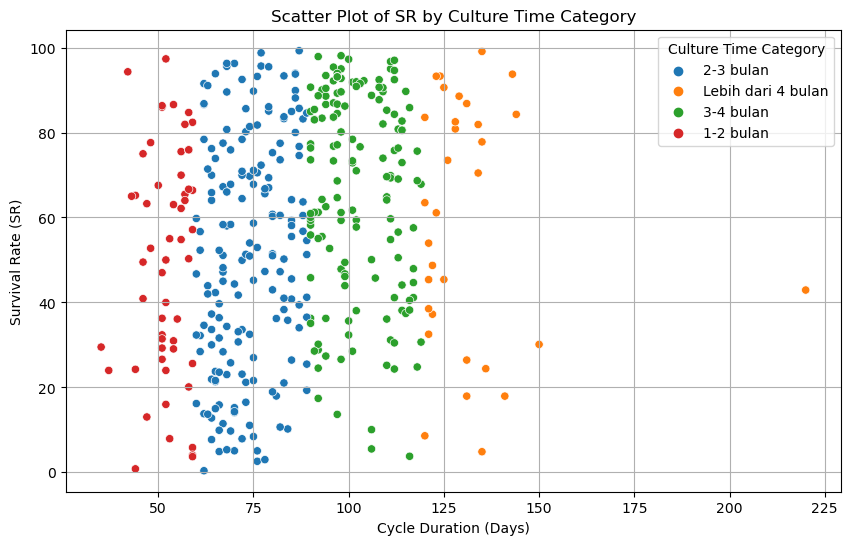

In [152]:
def categorize_culture_time(duration):
    if duration < 30:
        return 'Kurang dari 1 bulan'
    elif duration < 60:
        return '1-2 bulan'
    elif duration < 90:
        return '2-3 bulan'
    elif duration < 120:
        return '3-4 bulan'
    else:
        return 'Lebih dari 4 bulan'

final_merged_df['culture_time_category'] = final_merged_df['cycle_duration_days'].apply(categorize_culture_time)

# Scatter plot dengan kategori durasi budidaya
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cycle_duration_days', y='SR', hue='culture_time_category', data=final_merged_df)
plt.title('Scatter Plot of SR by Culture Time Category')
plt.xlabel('Cycle Duration (Days)')
plt.ylabel('Survival Rate (SR)')
plt.legend(title='Culture Time Category')
plt.grid(True)
plt.show()

### Merging the dataset with measurements

In [74]:
feeds_grouped = feeds.groupby('cycle_id').agg({'quantity': 'sum'}).reset_index()
harvests_grouped = harvests.groupby('cycle_id').agg({'weight': 'sum'}).reset_index()
cycles_with_fcr = feeds_grouped.merge(harvests_grouped, on='cycle_id')
cycles_with_fcr['FCR'] = cycles_with_fcr['quantity'] / cycles_with_fcr['weight']
cycles_with_fcr

,cycle_id,quantity,weight,FCR
0,7615,10619.000,5472.00,1.940607
1,7616,1416.500,700.00,2.023571
2,9090,8397.000,5639.00,1.489094
3,9091,819.500,268.20,3.055556
4,9094,136.900,115.00,1.190435
...,...,...,...,...
478,22813,6218.500,5293.20,1.174809
479,23359,1967.000,3517.08,0.559271
480,23362,1671.100,245.92,6.795299
481,23529,4096.222,2736.54,1.496862


In [75]:
performance = cycles_with_adg[['cycle_id', 'ADG']].merge(cycles_with_fcr[['cycle_id', 'FCR']], on='cycle_id')
performance

,cycle_id,ADG,FCR
0,18360,0.10,1.629570
1,14583,0.07,1.846418
2,19049,0.11,1.289266
3,16334,0.05,1.562297
4,18740,0.05,3.876951
...,...,...,...
474,15219,0.13,2.854010
475,19874,0.11,1.423997
476,17563,0.08,1.024633
477,15066,0.10,1.601581


In [76]:
performance = performance.merge(merged_df[['cycle_id', 'SR']], on='cycle_id')
performance

,cycle_id,ADG,FCR,SR
0,18360,0.10,1.629570,65.59
1,14583,0.07,1.846418,25.79
2,16334,0.05,1.562297,93.27
3,18740,0.05,3.876951,9.74
4,19518,0.09,2.076860,37.27
...,...,...,...,...
411,17532,0.11,1.377563,70.87
412,19318,0.03,1.659000,78.40
413,15219,0.13,2.854010,13.69
414,15066,0.10,1.601581,76.34


In [77]:
merged_data = performance.merge(measurements, on='cycle_id', how='left')
merged_data

,cycle_id,ADG,FCR,SR,pond_id,measured_date,morning_temperature,evening_temperature,morning_do,evening_do,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
0,18360,0.1,1.629570,65.59,33945,2022-12-06,27.6,29.1,5.4,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18360,0.1,1.629570,65.59,33945,2022-12-21,27.9,30.2,5.4,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18360,0.1,1.629570,65.59,33945,2022-11-24,26.4,27.8,2.5,4.0,...,NaN,0.0,257.0,NaN,350.0,1050.0,NaN,NaN,NaN,NaN
3,18360,0.1,1.629570,65.59,33945,2022-11-29,26.1,27.8,5.3,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18360,0.1,1.629570,65.59,33945,2023-02-10,24.9,26.8,5.0,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31974,15106,0.1,2.637252,40.89,30788,2022-03-25,27.7,28.7,7.5,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31975,15106,0.1,2.637252,40.89,30788,2022-04-12,26.8,28.4,7.6,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31976,15106,0.1,2.637252,40.89,30788,2022-04-11,26.3,29.8,7.3,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31977,15106,0.1,2.637252,40.89,30788,2022-03-18,28.2,30.0,8.1,6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
merged_data.describe()

,cycle_id,ADG,FCR,SR,pond_id,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
count,31979.000000,31979.000000,31979.000000,31979.000000,31979.000000,26759.000000,25387.000000,20456.000000,19907.000000,22938.000000,...,391.000000,2976.000000,3432.000000,1.917000e+03,2181.000000,2185.000000,1640.000000,2018.000000,1886.000000,3.148000e+03
mean,17710.429845,0.102271,2.238672,58.568044,28514.871384,28.833922,29.626848,5.388500,5.843557,22.238430,...,11.245801,34.893315,145.456480,5.419440e+03,475.804181,1605.110016,16.912043,133.027978,90.537384,5.893907e+05
std,2837.924303,0.048532,3.964951,26.968186,9672.830574,167.000987,9.465237,39.652941,5.746300,62.652483,...,19.011654,1170.769127,335.455556,4.564137e+04,304.392214,1679.305328,130.514805,435.063903,32.991598,8.541011e+05
min,7615.000000,0.030000,0.019337,0.390000,1.000000,2.640000,2.380000,-21.359000,-42.260000,-25.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,16054.000000,0.080000,1.342546,36.250000,21965.000000,27.000000,28.633333,4.330000,4.820000,16.000000,...,1.000000,0.022750,114.000000,3.250000e+03,297.000000,860.000000,0.000000,100.000000,70.265000,7.000000e+04
50%,18142.000000,0.100000,1.629570,61.160000,32245.000000,28.000000,29.700000,5.000000,5.600000,22.000000,...,3.000000,0.064000,130.000000,4.800000e+03,400.000000,1125.000000,0.500000,120.000000,92.000000,3.462500e+05
75%,19670.000000,0.120000,2.125564,83.260000,34720.000000,28.800000,30.600000,5.700000,6.530000,28.000000,...,10.000000,0.434000,155.000000,5.500000e+03,560.000000,1409.400000,16.000000,140.000000,106.000000,7.731250e+05
max,23531.000000,1.160000,53.566667,99.250000,39725.000000,27341.000000,1078.933333,5642.000000,768.000000,9124.000000,...,75.000000,48031.000000,19589.000000,2.000000e+06,3700.000000,32000.000000,2400.000000,19589.000000,458.000000,1.953000e+07


In [79]:
# Kami ingin memfilter data untuk menghapus atau mengubah nilai yang di luar jangkauan
# Kisaran suhu yang wajar adalah antara 10 dan 40 derajat Celcius.
# Kisaran keseimbangan pH antara 0-14
filtered_data = merged_data[(merged_data['morning_temperature'] >= 10) & (merged_data['morning_temperature'] <= 40)]
filtered_data = filtered_data[(filtered_data['evening_temperature'] >= 10) & (filtered_data['evening_temperature'] <= 40)]
filtered_data = filtered_data[(filtered_data['morning_pH'] >= 0) & (filtered_data['morning_pH'] <= 14)]
filtered_data = filtered_data[(filtered_data['evening_pH'] >= 0) & (filtered_data['evening_pH'] <= 14)]

In [80]:
filtered_data

,cycle_id,ADG,FCR,SR,pond_id,measured_date,morning_temperature,evening_temperature,morning_do,evening_do,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
0,18360,0.1,1.629570,65.59,33945,2022-12-06,27.6,29.1,5.4,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18360,0.1,1.629570,65.59,33945,2022-12-21,27.9,30.2,5.4,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18360,0.1,1.629570,65.59,33945,2022-11-24,26.4,27.8,2.5,4.0,...,NaN,0.0,257.0,NaN,350.0,1050.0,NaN,NaN,NaN,NaN
3,18360,0.1,1.629570,65.59,33945,2022-11-29,26.1,27.8,5.3,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18360,0.1,1.629570,65.59,33945,2023-02-10,24.9,26.8,5.0,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31974,15106,0.1,2.637252,40.89,30788,2022-03-25,27.7,28.7,7.5,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31975,15106,0.1,2.637252,40.89,30788,2022-04-12,26.8,28.4,7.6,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31976,15106,0.1,2.637252,40.89,30788,2022-04-11,26.3,29.8,7.3,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31977,15106,0.1,2.637252,40.89,30788,2022-03-18,28.2,30.0,8.1,6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
filtered_data.describe()

,cycle_id,ADG,FCR,SR,pond_id,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
count,13946.000000,13946.000000,13946.000000,13946.000000,13946.000000,13946.000000,13946.000000,10079.000000,9948.000000,9329.000000,...,209.000000,1623.000000,1516.000000,987.000000,1138.000000,1141.000000,930.000000,1000.00000,903.000000,1.692000e+03
mean,17791.961566,0.095529,2.341983,55.915244,28225.990678,27.659641,29.316792,5.129337,5.656357,22.716282,...,3.628947,56.119872,146.790080,4842.730547,475.567064,1490.242975,8.548387,119.77850,86.322501,6.193332e+05
std,2842.445597,0.033893,3.950346,27.483675,10167.743899,1.467483,1.700896,5.981011,1.699316,7.623199,...,3.966170,1580.849033,54.762509,1780.514027,311.540430,1207.332089,12.646146,35.16088,30.021239,9.555874e+05
min,7615.000000,0.030000,0.019337,0.830000,1.000000,14.381000,17.100000,-11.848000,0.000000,0.000000,...,0.000000,0.000000,0.026000,0.000000,1.465000,0.000000,0.000000,29.00000,10.110000,0.000000e+00
25%,16136.000000,0.070000,1.424091,32.340000,21974.000000,27.000000,28.400000,4.333167,4.800000,17.000000,...,1.000000,0.024000,112.000000,4000.000000,243.000000,812.000000,0.000000,100.00000,69.400000,8.000000e+00
50%,18237.000000,0.090000,1.655997,57.750000,32219.000000,27.991000,29.500000,5.000000,5.500000,23.000000,...,3.000000,0.058000,132.000000,5151.000000,400.000000,1118.000000,4.000000,120.00000,89.000000,3.175000e+05
75%,19688.000000,0.110000,2.116845,82.520000,34720.000000,28.615250,30.300000,5.637000,6.300000,29.000000,...,3.000000,0.275000,162.000000,5600.000000,560.000000,1265.000000,12.000000,134.00000,100.125000,8.612500e+05
max,23359.000000,0.340000,53.566667,99.250000,39615.000000,35.000000,36.200000,559.000000,82.033333,233.000000,...,20.000000,48031.000000,392.000000,45000.000000,1650.000000,6060.000000,141.000000,320.00000,458.000000,1.953000e+07


In [82]:
filtered_data.columns

Index(['cycle_id', 'ADG', 'FCR', 'SR', 'pond_id', 'measured_date',
       'morning_temperature', 'evening_temperature', 'morning_do',
       'evening_do', 'morning_salinity', 'evening_salinity', 'morning_pH',
       'evening_pH', 'transparency', 'turbidity', 'ammonia', 'nitrate',
       'nitrite', 'alkalinity', 'hardness', 'calcium', 'magnesium',
       'carbonate', 'bicarbonate', 'tom', 'total_plankton_'],
      dtype='object')

In [83]:
filtered_data

,cycle_id,ADG,FCR,SR,pond_id,measured_date,morning_temperature,evening_temperature,morning_do,evening_do,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
0,18360,0.1,1.629570,65.59,33945,2022-12-06,27.6,29.1,5.4,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18360,0.1,1.629570,65.59,33945,2022-12-21,27.9,30.2,5.4,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18360,0.1,1.629570,65.59,33945,2022-11-24,26.4,27.8,2.5,4.0,...,NaN,0.0,257.0,NaN,350.0,1050.0,NaN,NaN,NaN,NaN
3,18360,0.1,1.629570,65.59,33945,2022-11-29,26.1,27.8,5.3,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18360,0.1,1.629570,65.59,33945,2023-02-10,24.9,26.8,5.0,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31974,15106,0.1,2.637252,40.89,30788,2022-03-25,27.7,28.7,7.5,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31975,15106,0.1,2.637252,40.89,30788,2022-04-12,26.8,28.4,7.6,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31976,15106,0.1,2.637252,40.89,30788,2022-04-11,26.3,29.8,7.3,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31977,15106,0.1,2.637252,40.89,30788,2022-03-18,28.2,30.0,8.1,6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = filtered_data['morning_do'].quantile(0.25)
Q3 = filtered_data['morning_do'].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outlier
outliers = filtered_data[(filtered_data['morning_do'] < lower_bound) | (filtered_data['morning_do'] > upper_bound)]

# Menampilkan outlier
print("Outliers in morning_do column:")
print(outliers)

Outliers in morning_do column:
       cycle_id   ADG       FCR     SR  pond_id measured_date  \
44        18360  0.10  1.629570  65.59    33945    2022-11-22   
53        18360  0.10  1.629570  65.59    33945    2022-11-23   
234       16334  0.05  1.562297  93.27     7369    2022-12-17   
384       19518  0.09  2.076860  37.27    32214    2022-09-27   
577       17437  0.11  0.667155  83.26    25400    2022-08-01   
...         ...   ...       ...    ...      ...           ...   
31968     15106  0.10  2.637252  40.89    30788    2022-03-12   
31973     15106  0.10  2.637252  40.89    30788    2022-03-21   
31975     15106  0.10  2.637252  40.89    30788    2022-04-12   
31977     15106  0.10  2.637252  40.89    30788    2022-03-18   
31978     15106  0.10  2.637252  40.89    30788    2022-04-05   

       morning_temperature  evening_temperature  morning_do  evening_do  ...  \
44                  27.000               27.800       1.000       3.700  ...   
53                  27.100  

In [86]:
# Menghapus outlier dari DataFrame
filtered_data_cleaned = filtered_data[(filtered_data['morning_do'] >= lower_bound) & (filtered_data['morning_do'] <= upper_bound)]

# Menampilkan DataFrame yang sudah dibersihkan
print("Cleaned filtered data:")
filtered_data_cleaned

Cleaned filtered data:


,cycle_id,ADG,FCR,SR,pond_id,measured_date,morning_temperature,evening_temperature,morning_do,evening_do,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
0,18360,0.1,1.629570,65.59,33945,2022-12-06,27.6,29.1,5.4,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18360,0.1,1.629570,65.59,33945,2022-12-21,27.9,30.2,5.4,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18360,0.1,1.629570,65.59,33945,2022-11-24,26.4,27.8,2.5,4.0,...,NaN,0.0,257.0,NaN,350.0,1050.0,NaN,NaN,NaN,NaN
3,18360,0.1,1.629570,65.59,33945,2022-11-29,26.1,27.8,5.3,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18360,0.1,1.629570,65.59,33945,2023-02-10,24.9,26.8,5.0,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31969,15106,0.1,2.637252,40.89,30788,2022-04-03,26.2,28.6,7.5,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31971,15106,0.1,2.637252,40.89,30788,2022-03-11,30.9,32.3,3.4,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31972,15106,0.1,2.637252,40.89,30788,2022-04-01,26.1,28.1,7.4,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31974,15106,0.1,2.637252,40.89,30788,2022-03-25,27.7,28.7,7.5,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = filtered_data['evening_do'].quantile(0.25)
Q3 = filtered_data['evening_do'].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outlier
outliers_2 = filtered_data[(filtered_data['evening_do'] < lower_bound) | (filtered_data['evening_do'] > upper_bound)]

# Menampilkan outlier
print("Outliers in evening_do column:")
print(outliers_2)

Outliers in evening_do column:
       cycle_id   ADG       FCR     SR  pond_id measured_date  \
65        18360  0.10  1.629570  65.59    33945    2022-11-21   
595       17437  0.11  0.667155  83.26    25400    2022-09-19   
606       17437  0.11  0.667155  83.26    25400    2022-10-04   
632       17437  0.11  0.667155  83.26    25400    2022-09-29   
980       16155  0.09  2.074813  21.05    25398    2022-05-11   
...         ...   ...       ...    ...      ...           ...   
31259     18238  0.07  1.942615  81.76    38365    2023-03-26   
31476     19313  0.08  1.300228  31.43        8    2022-09-17   
31935     15106  0.10  2.637252  40.89    30788    2022-03-19   
31939     15106  0.10  2.637252  40.89    30788    2022-03-15   
31953     15106  0.10  2.637252  40.89    30788    2022-03-16   

       morning_temperature  evening_temperature  morning_do  evening_do  ...  \
65                  27.000               28.000       5.000       2.400  ...   
595                 28.600  

In [88]:
# Menghapus outlier dari DataFrame
filtered_data_cleaned = filtered_data[(filtered_data['evening_do'] >= lower_bound) & (filtered_data['evening_do'] <= upper_bound)]

# Menampilkan DataFrame yang sudah dibersihkan
print("Cleaned filtered data:")
filtered_data_cleaned

Cleaned filtered data:


,cycle_id,ADG,FCR,SR,pond_id,measured_date,morning_temperature,evening_temperature,morning_do,evening_do,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
0,18360,0.1,1.629570,65.59,33945,2022-12-06,27.6,29.1,5.4,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18360,0.1,1.629570,65.59,33945,2022-12-21,27.9,30.2,5.4,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18360,0.1,1.629570,65.59,33945,2022-11-24,26.4,27.8,2.5,4.0,...,NaN,0.0,257.0,NaN,350.0,1050.0,NaN,NaN,NaN,NaN
3,18360,0.1,1.629570,65.59,33945,2022-11-29,26.1,27.8,5.3,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18360,0.1,1.629570,65.59,33945,2023-02-10,24.9,26.8,5.0,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31974,15106,0.1,2.637252,40.89,30788,2022-03-25,27.7,28.7,7.5,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31975,15106,0.1,2.637252,40.89,30788,2022-04-12,26.8,28.4,7.6,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31976,15106,0.1,2.637252,40.89,30788,2022-04-11,26.3,29.8,7.3,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31977,15106,0.1,2.637252,40.89,30788,2022-03-18,28.2,30.0,8.1,6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


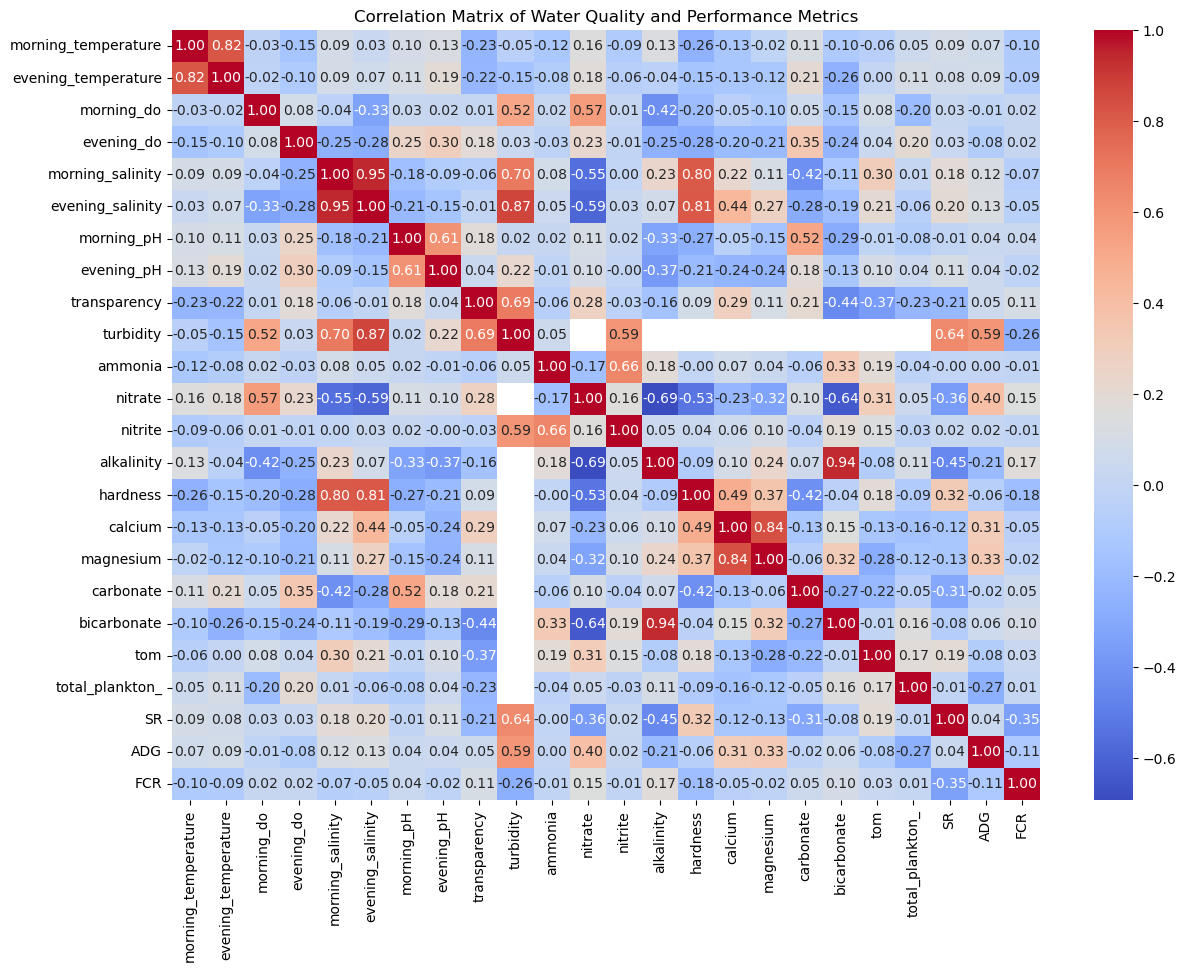

In [89]:
# Heatmap untuk melihat korelasi antara semua variabel kualitas air dengan performa budidaya
plt.figure(figsize=(14, 10))
correlation_matrix = filtered_data_cleaned[['morning_temperature', 'evening_temperature', 'morning_do', 'evening_do', 
                                  'morning_salinity', 'evening_salinity', 'morning_pH', 'evening_pH', 
                                  'transparency', 'turbidity', 'ammonia', 'nitrate', 'nitrite', 
                                  'alkalinity', 'hardness', 'calcium', 'magnesium', 'carbonate', 
                                  'bicarbonate', 'tom', 'total_plankton_', 'SR', 'ADG', 'FCR']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Water Quality and Performance Metrics')
plt.show()

### **Analysis Air terhadap performa budidaya udang**

#### **Survival Rate (SR)**
**Korelasi Kuat:**
- Morning Salinity: Salinitas yang optimal di pagi hari dapat meningkatkan ketahanan hidup udang. Udang membutuhkan salinitas tertentu untuk mendukung osmoregulasi yang efisien.
- Evening Salinity: Konsistensi salinitas sepanjang hari juga penting untuk kesehatan udang.
- Turbidity (Kekeruhan): Kekeruhan moderat dapat menunjukkan jumlah plankton yang cukup, tetapi kekeruhan yang berlebihan bisa berbahaya.
- Hardness (Kekerasan Air): Kekerasan air yang cukup menyediakan mineral penting untuk perkembangan eksoskeleton udang.

**Korelasi Lemah:**
- Transparency (Transparansi): Walaupun penting, transparansi mungkin tidak begitu berpengaruh langsung pada SR dibandingkan faktor lain.
- Nitrate (Nitrat): Nitrat dalam jumlah kecil tidak begitu mempengaruhi SR, tetapi akumulasi yang tinggi bisa berbahaya.
- Alkalinity (Alkalinitas): Alkalinitas stabil membantu menjaga pH, tetapi dampaknya pada SR tidak terlalu signifikan dalam hasil ini.
- Carbonate (Karbonat): Karbonat berperan dalam stabilisasi pH, namun tidak begitu berkorelasi kuat dengan SR.
- FCR: Rasio konversi pakan yang efisien menunjukkan manajemen yang baik, tetapi tidak selalu berkorelasi langsung dengan SR.

#### **Average Daily Gain (ADG)**
**Korelasi Kuat:**
- Turbidity (Kekeruhan): Kekeruhan yang menunjukkan plankton yang memadai bisa menjadi sumber pakan alami yang meningkatkan pertumbuhan harian.
- Nitrate (Nitrat): Nitrat dalam jumlah moderat dapat menjadi indikasi nitrifikasi yang baik.
- Calcium (Kalsium): Kalsium penting untuk perkembangan eksoskeleton dan proses biologis lainnya.
- Magnesium: Magnesium juga penting untuk kesehatan eksoskeleton dan fungsi biologis udang.

**Korelasi Lemah:**
- Alkalinity (Alkalinitas): Sementara penting untuk stabilitas pH, dampaknya pada ADG tidak begitu signifikan.
- Total Plankton: Plankton yang berfungsi sebagai pakan tambahan bisa berpengaruh, tetapi dalam hasil ini, korelasinya lemah.

#### **Feed Conversion Ratio (FCR)**
**Korelasi Kuat:**
- Nitrate (Nitrat): Kadar nitrat yang baik menunjukkan pengelolaan yang efisien dan pakan yang optimal.
- Alkalinity (Alkalinitas): Stabilitas pH yang dijaga dengan alkalinitas yang baik membantu dalam pakan yang efisien dan kesehatan udang.

**Korelasi Lemah:**
- Turbidity (Kekeruhan): Walaupun kekeruhan menunjukkan plankton, dampaknya pada FCR tidak begitu signifikan.
- Hardness (Kekerasan Air): Kekerasan penting untuk kesehatan udang, tetapi dampaknya pada FCR tidak terlalu signifikan.
- SR: Survival rate menunjukkan manajemen yang baik, namun hubungannya dengan efisiensi konversi pakan lemah.